In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use(['science'])
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = "medium"
mpl.rcParams['ytick.labelsize'] = "medium"
mpl.rcParams['legend.fontsize'] = "large"
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['lines.linewidth'] = 1.5

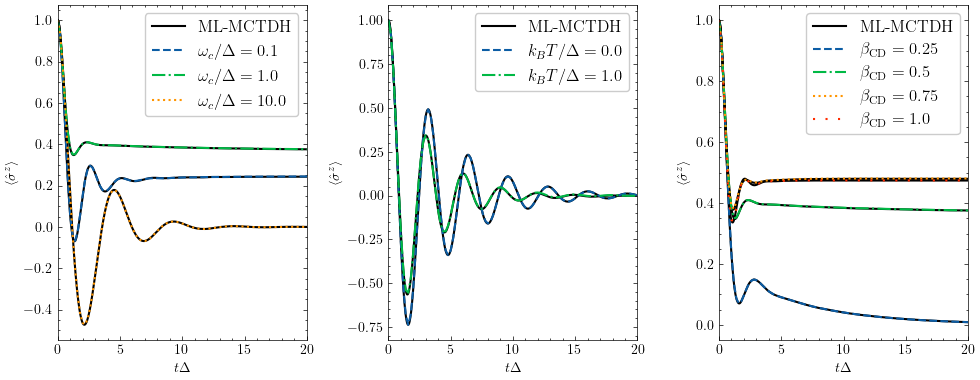

In [2]:
def mctdh_data(fname):
    with open(fname) as f:
        lines = f.readlines()
    lines = [x.replace('D', 'E') for x in lines]    
    mctdh = np.loadtxt(lines)
    mctdh[:,0] *= 0.039292731
    return mctdh

fig = plt.figure(figsize=(10, 4))
axis = fig.subplots(1, 3)

linestyles = ["--", "-.", ":", (0, (1, 5))]

plt.sca(axis[0])

mctdh_dict = {
"001": "./mctdh/Fig3a/0.1.dat",
"010": "./mctdh/Fig3a/1.dat",
"100": "./mctdh/Fig3a/10.dat",
}
for i, omega in enumerate(["001", "010", "100"]):

    data = mctdh_data(mctdh_dict[omega])
    if omega == "001":
        label="ML-MCTDH"
    else:
        label=None
    plt.plot(data[:, 0], data[:, 1], color="black", zorder=-1, label=label)

    with open(f"dt020/ps1_binary_ita050_omega{omega}_beta050.log") as fin:
        lines = fin.readlines()
    zs = [1]
    good = False
    for line in lines:
        if "expander bond dimension" in line:
            good = True
        if good and len(line.split()) == 4:
            # print(line.split())
            z = float(line.split()[2][1:-1])
            x = float(line.split()[-1][:-1])
            zs.append(z)
    time = np.arange(len(zs))*0.2
    plt.plot(time, zs, label=r"$\omega_c/\Delta=" + str(float(omega)/10) +"$", linestyle=linestyles[i])


plt.legend()
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.xlim(0, 20)


plt.sca(axis[1])
mctdh_dict = {
"000": "./mctdh/Fig4a/0K.dat",
"010": "./mctdh/Fig4a/300K.dat",
}
local_dict = {
"000": "./dt020/ps1_binary_ita010_omega010_beta025.log",
#"010": "./Fig4a/ps1_binary_ita010_omega010_beta025_temperature010.log",
"010": "../Fig8/Fig4a-modes250/ps1_binary_Ms96_ita010_omega010_beta025_temperature10.log"
}
for i, temperature in enumerate(["000", "010"]):
    
    data = mctdh_data(mctdh_dict[temperature])
    if temperature == "000":
        label="ML-MCTDH"
    else:
        label=None
    plt.plot(data[:, 0], data[:, 1], color="black", zorder=-1, label=label)
    
    with open(local_dict[temperature]) as fin:
        lines = fin.readlines()
    zs = [1]
    good = False
    for line in lines:
        if "expander bond dimension" in line:
            good = True
        if good and len(line.split()) == 4 and line.split()[2][0] == "(":
            # print(line.split())
            z = complex(line.split()[2][1:-1])
            x = complex(line.split()[-1][:-1])
            zs.append(z)
    time = np.arange(len(zs))*0.2
    plt.plot(time, np.array(zs).real, label=r"$k_BT/\Delta=" + str(float(temperature)/10) + "$", linestyle=linestyles[i])

plt.legend()
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.xlim(0, 20)

plt.sca(axis[2])
mctdh_dict = {
"025": "./mctdh/Fig6b/0.25.dat",
"075": "./mctdh/Fig6b/0.75.dat",
"050": "./mctdh/Fig6b/0.5.dat",
"100": "./mctdh/Fig6b/1.dat",
}
for i, beta in enumerate(["025", "050", "075", "100"]):

    data = mctdh_data(mctdh_dict[beta])
    if beta == "025":
        label="ML-MCTDH"
    else:
        label=None
    plt.plot(data[:, 0], data[:, 1], color="black", zorder=-1, label=label)

    with open(f"Fig6b/ps1_binary_ita050_omega010_beta{beta}.log") as fin:
        lines = fin.readlines()
    zs = [1]
    good = False
    for line in lines:
        if "expander bond dimension" in line:
            good = True
        if good and len(line.split()) == 4:
            # print(line.split())
            z = float(line.split()[2][1:-1])
            x = float(line.split()[-1][:-1])
            zs.append(z)
    time = np.arange(len(zs))*0.2
    plt.plot(time, zs, label=r"$\beta_{\rm{CD}}=" + str(float(beta)/100) + "$", linestyle=linestyles[i])


plt.legend()
plt.xlabel(r"$t\Delta$")
plt.ylabel(r"$\langle \hat \sigma^z \rangle$")
plt.xlim(0, 20)

plt.tight_layout()
plt.savefig("cole_davidson.pdf")